In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from functions import *

# 1 Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [124]:
folder_path = "data/e production=ep sanyo ep sanyo 002"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []
dfarrnames = []

# Loop through the CSV files and load only those ending with "Format01=Kreis 5-064"
for csv_file in csv_files:
    if "Format01=Kreis" in csv_file:
        if "TBA_CU" in csv_file:
            dfarr = pd.read_csv(csv_file, skiprows=[1])
            dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
            dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
            dfarr['Zeit'] = dfarr['Zeit'] / 3600
            dataframes.append(dfarr)
            dfarrnames.append(csv_file)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles += 1
print(noFiles)

DataFrame 1 - Rows: 24697, Columns: 18
DataFrame 2 - Rows: 24345, Columns: 18
DataFrame 3 - Rows: 24937, Columns: 18
DataFrame 4 - Rows: 24891, Columns: 18
DataFrame 5 - Rows: 25275, Columns: 18
DataFrame 6 - Rows: 24968, Columns: 18
DataFrame 7 - Rows: 25748, Columns: 18
DataFrame 8 - Rows: 28881, Columns: 18
DataFrame 9 - Rows: 27547, Columns: 18
DataFrame 10 - Rows: 28306, Columns: 18
DataFrame 11 - Rows: 28828, Columns: 18
DataFrame 12 - Rows: 28577, Columns: 18
DataFrame 13 - Rows: 42219, Columns: 18
DataFrame 14 - Rows: 41616, Columns: 18
DataFrame 15 - Rows: 29388, Columns: 18
DataFrame 16 - Rows: 28592, Columns: 18
DataFrame 17 - Rows: 28947, Columns: 18
17


test that data is loaded succesfully

In [125]:
num_rows, num_columns = dataframes[1].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
dataframes[i].head()

Number of rows (length): 24345
Number of columns (width): 18


,Schritt,Zustand,Zeit,Programmdauer,Schrittdauer,Zyklus,Zyklusebene,Prozedur,Prozedurebene,AhAkku,AhLad,AhEla,AhStep,Energie,WhStep,Spannung,Strom,Temp1
0,4,PAU,0.000000,67.0,6.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.705922,0.0,27.0625
1,4,PAU,0.002783,10098.0,10037.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.706654,0.0,27.0625
2,4,PAU,0.005556,20076.0,20015.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.705922,0.0,27.1250
3,4,PAU,0.008339,30094.0,30033.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.706288,0.0,27.0625
4,4,PAU,0.011114,40084.0,40023.0,0,0,TBA_CUv2,0,0.0,0.0,0.0,0.0,0.0,0.0,3.705557,0.0,27.1250


### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

Graph No. : 0
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-16 070821=TBA_CU=TS010903  Format01=Kreis 5-064.csv


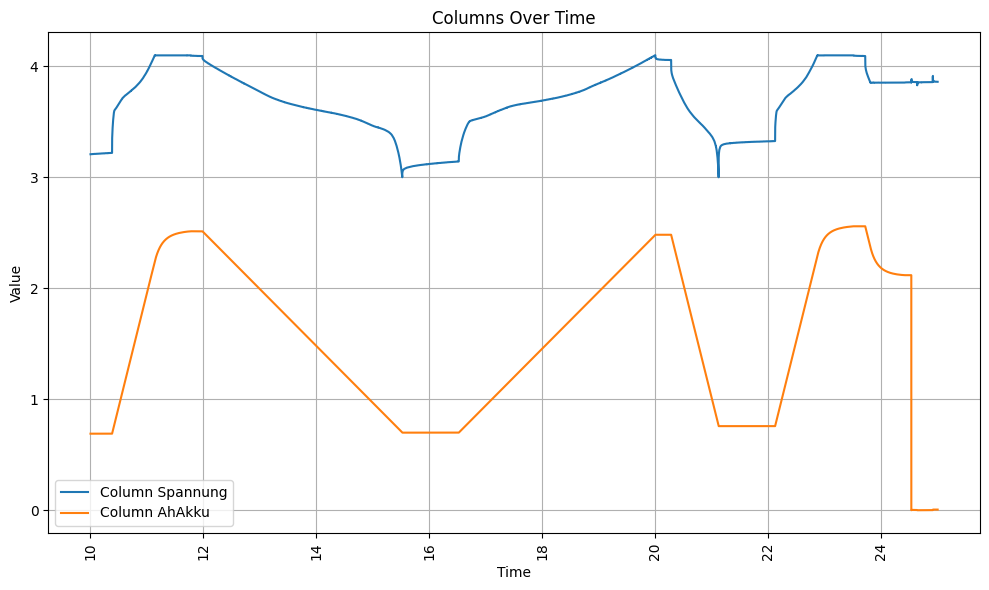

Graph No. : 1
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-04 024752=TBA_CU=TS011765  Format01=Kreis 5-064.csv


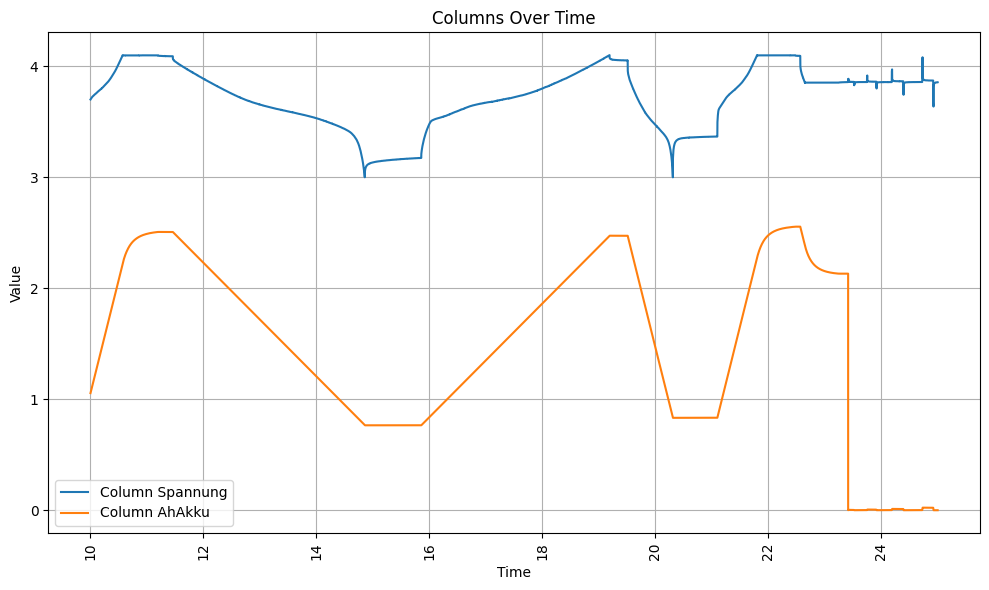

Graph No. : 2
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-13 011029=TBA_CUv2=TS012203  Format01=Kreis 5-064.csv


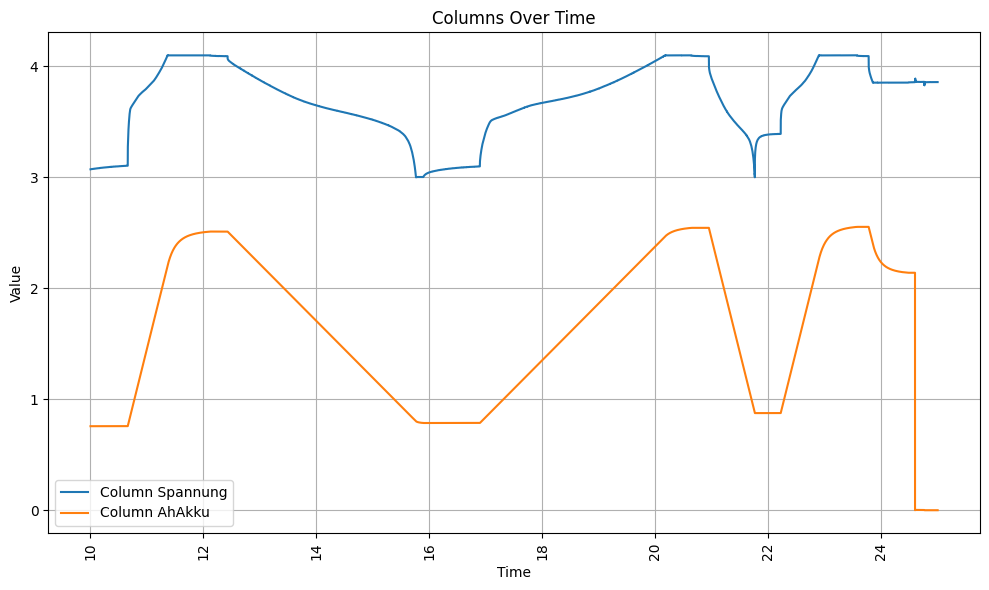

Graph No. : 3
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-21 134126=TBA_CUv2=TS012700  Format01=Kreis 5-064.csv


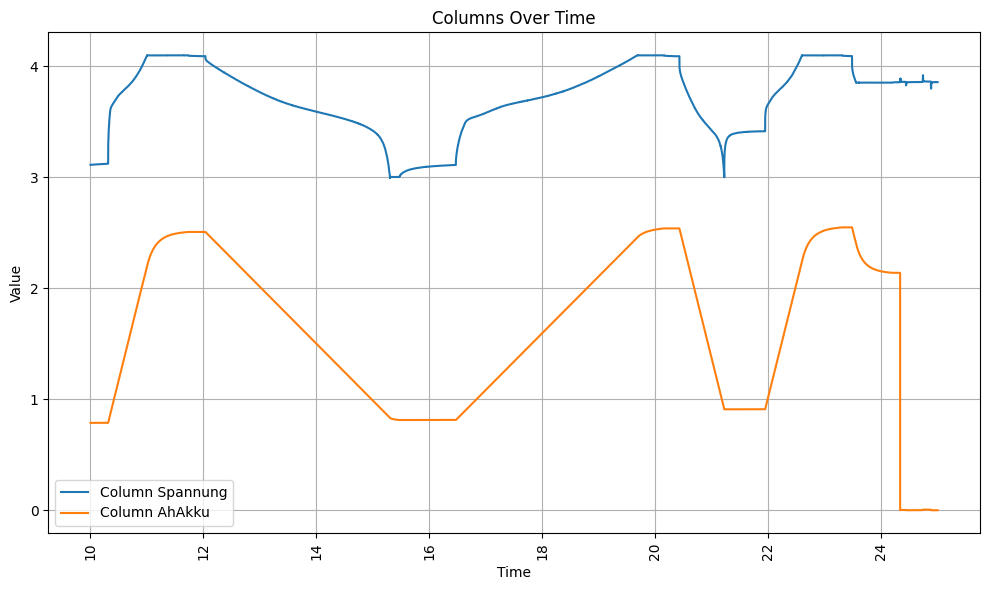

Graph No. : 4
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-02 105805=TBA_CUv2=TS013139  Format01=Kreis 5-064.csv


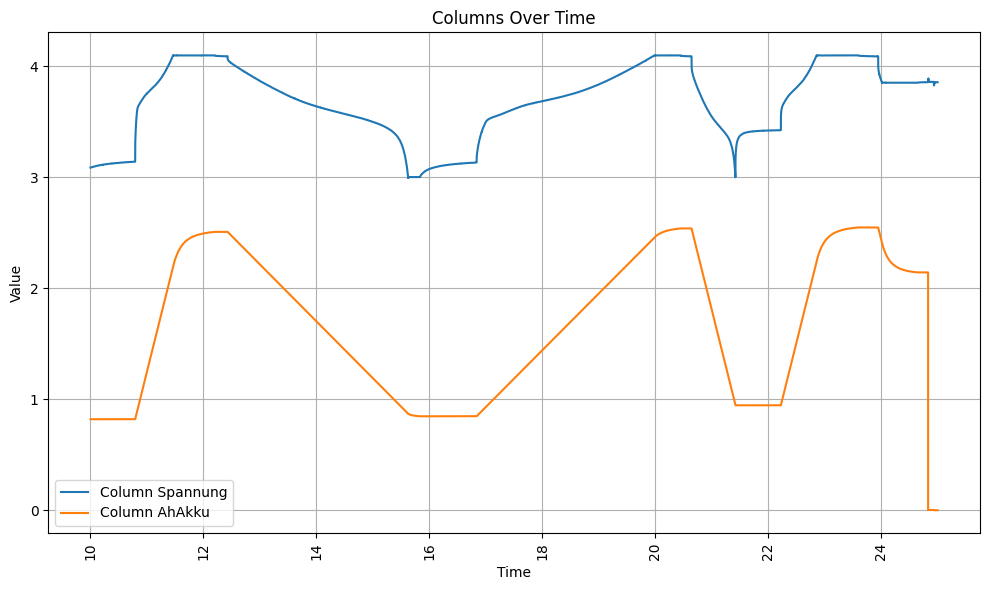

Graph No. : 5
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-04 105953=TBA_CUv2=TS013217  Format01=Kreis 5-064.csv


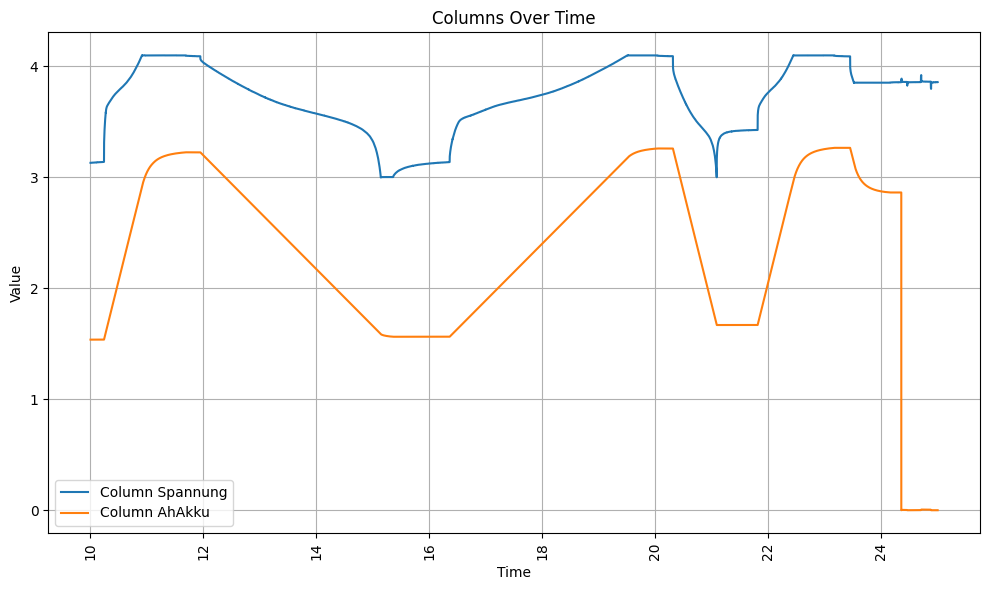

Graph No. : 6
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-13 130326=TBA_CUv2=TS013737  Format01=Kreis 5-064.csv


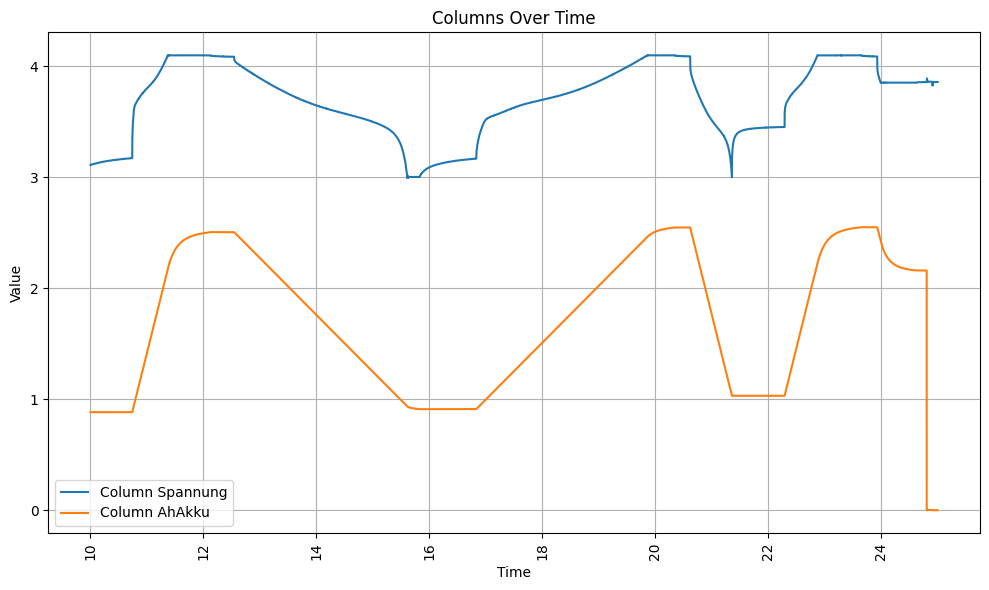

Graph No. : 7
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-24 115408=TBA_CUv2=TS014406  Format01=Kreis 5-064.csv


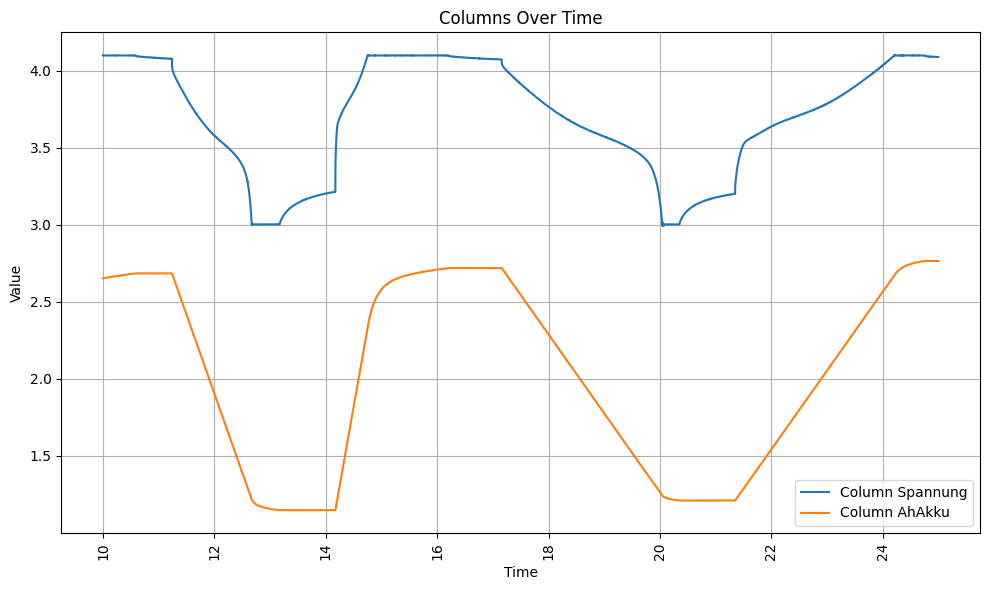

Graph No. : 8
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-02 093425=TBA_CUv2=TS014816  Format01=Kreis 5-064.csv


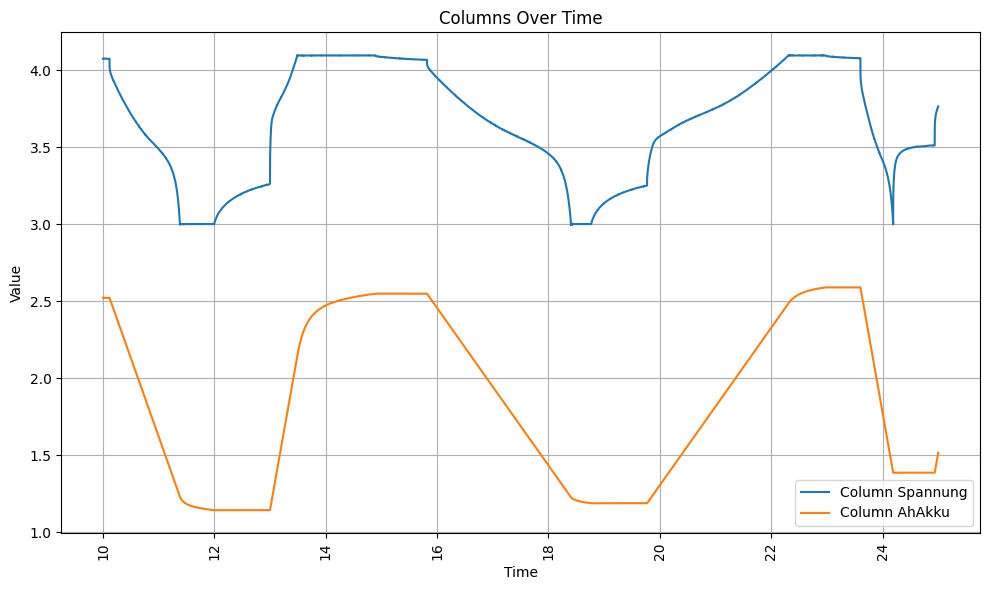

Graph No. : 9
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-11 085128=TBA_CUv2=TS015275  Format01=Kreis 5-064.csv


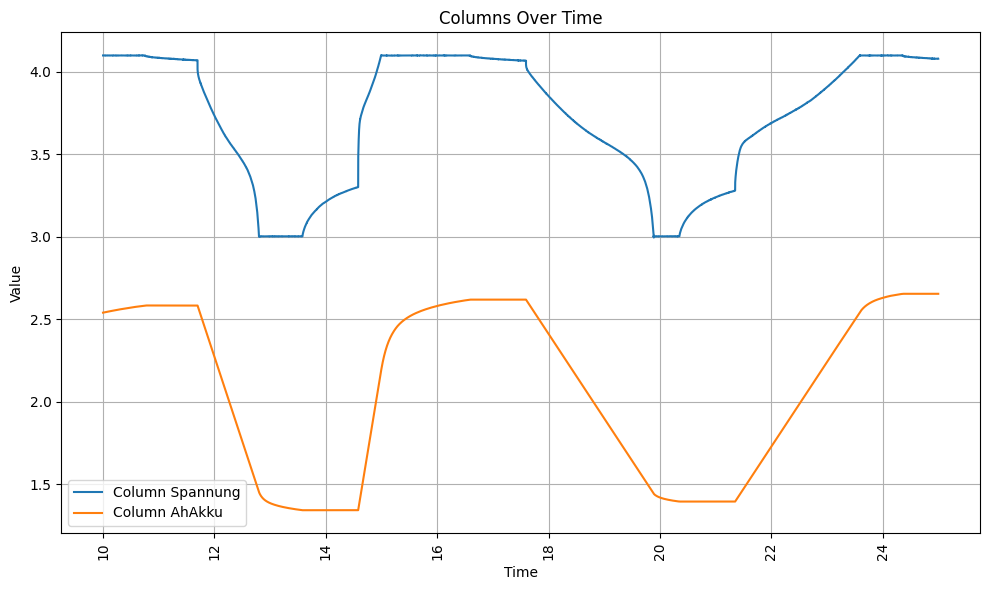

Graph No. : 10
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-20 093647=TBA_CUv2=TS015937  Format01=Kreis 5-064.csv


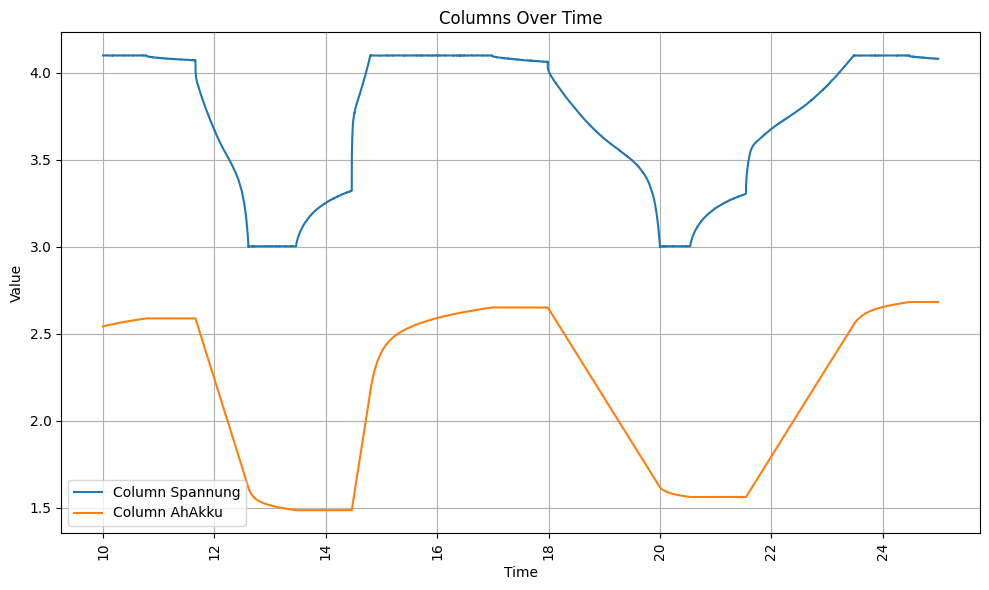

Graph No. : 11
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-29 094510=TBA_CUv2=TS016442  Format01=Kreis 5-064.csv


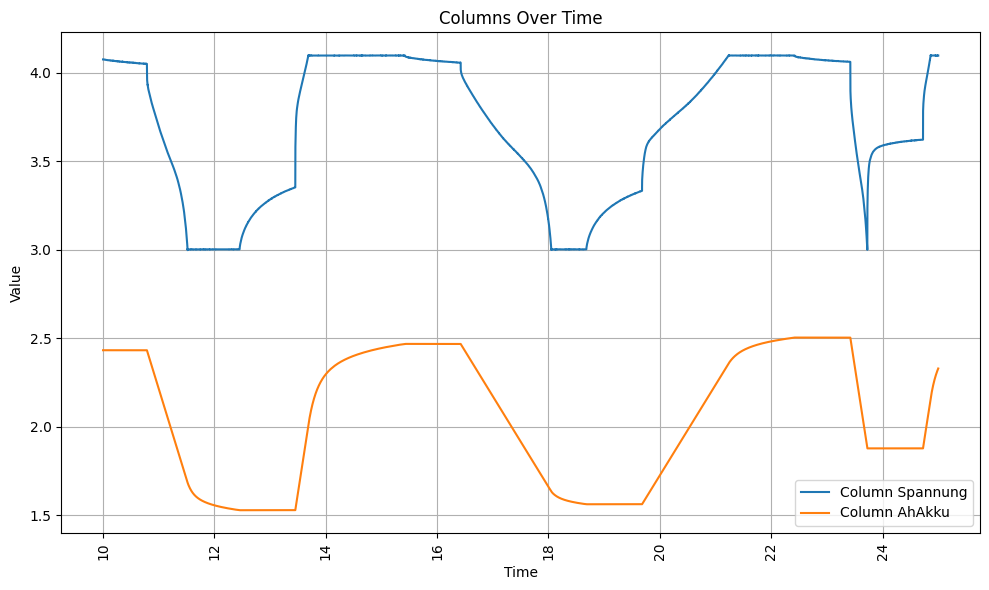

Graph No. : 12
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-08 091310=TBA_CUv2=TS016945  Format01=Kreis 5-064.csv


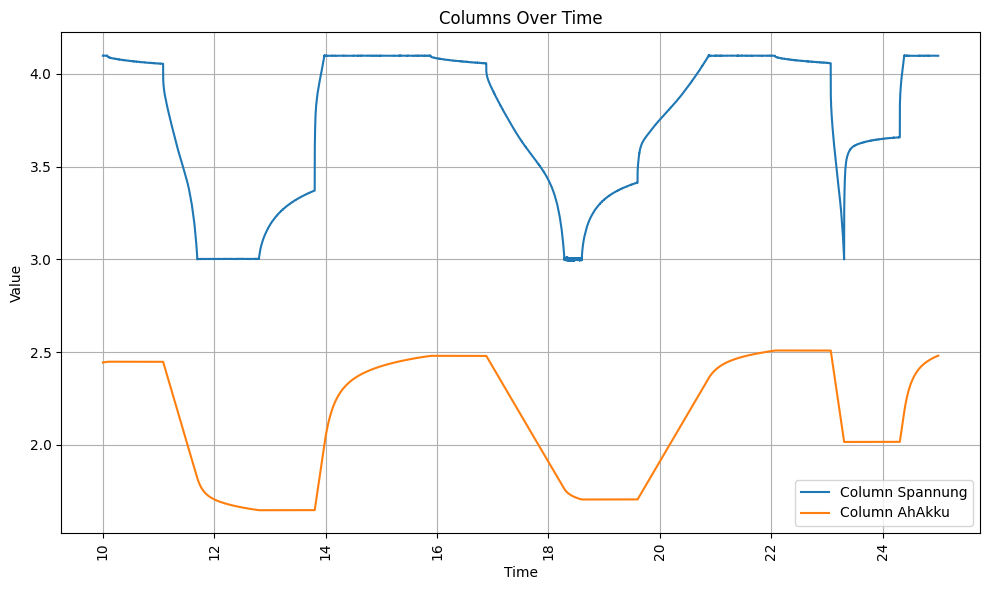

Graph No. : 13
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-17 194126=TBA_CUv2=TS017499  Format01=Kreis 5-064.csv


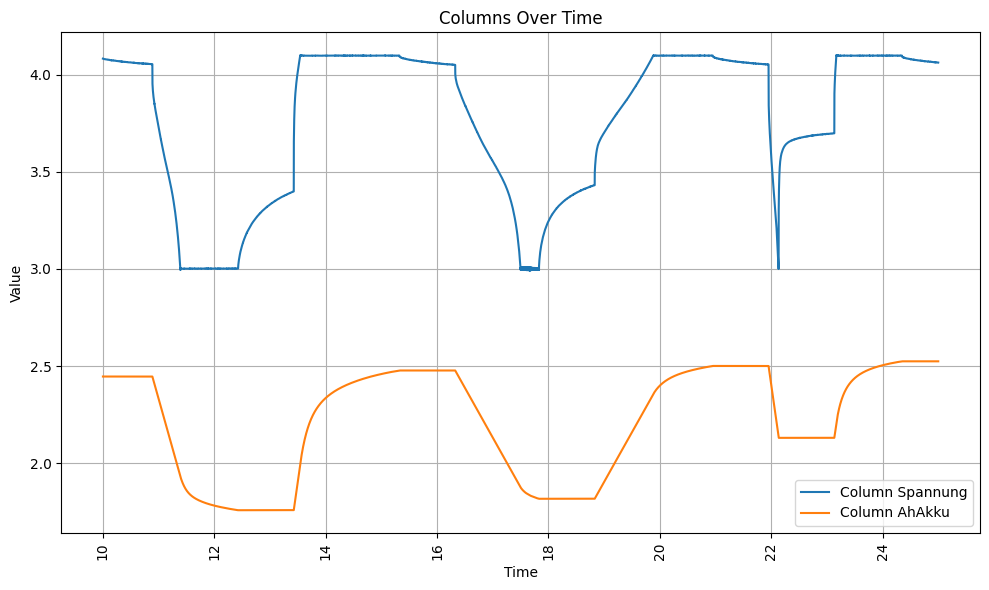

Graph No. : 14
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-28 011137=TBA_CUv2=TS017939  Format01=Kreis 5-064.csv


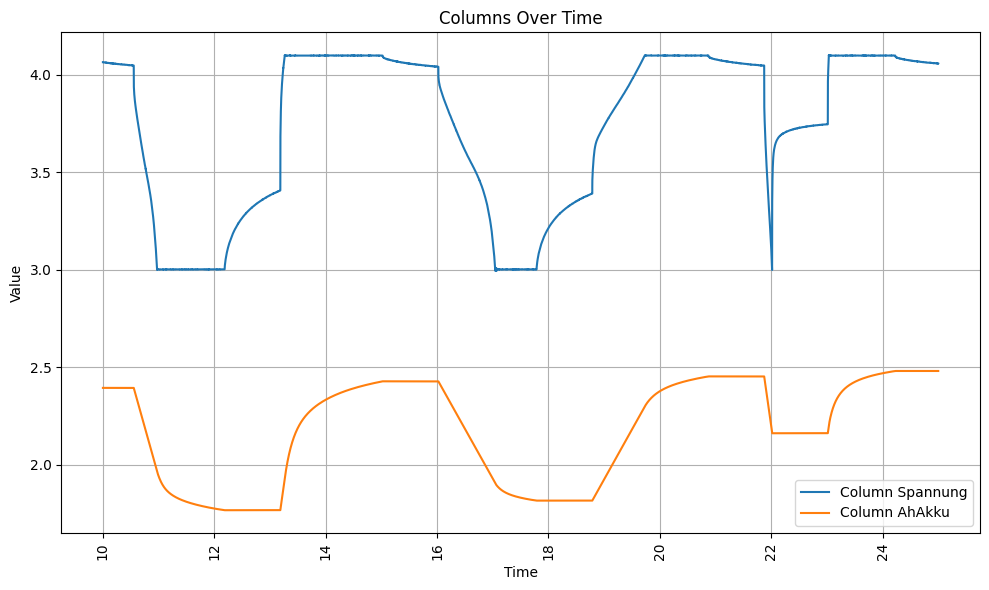

Graph No. : 15
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-06-06 082834=TBA_CUv2=TS018457  Format01=Kreis 5-064.csv


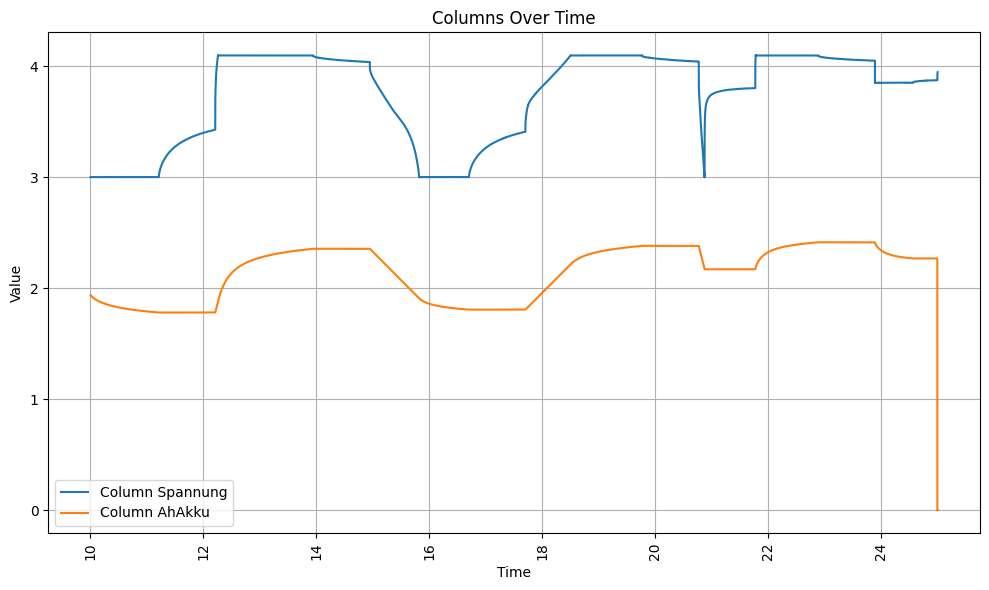

Graph No. : 16
data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-06-13 195739=TBA_CUv2=TS018886  Format01=Kreis 5-064.csv


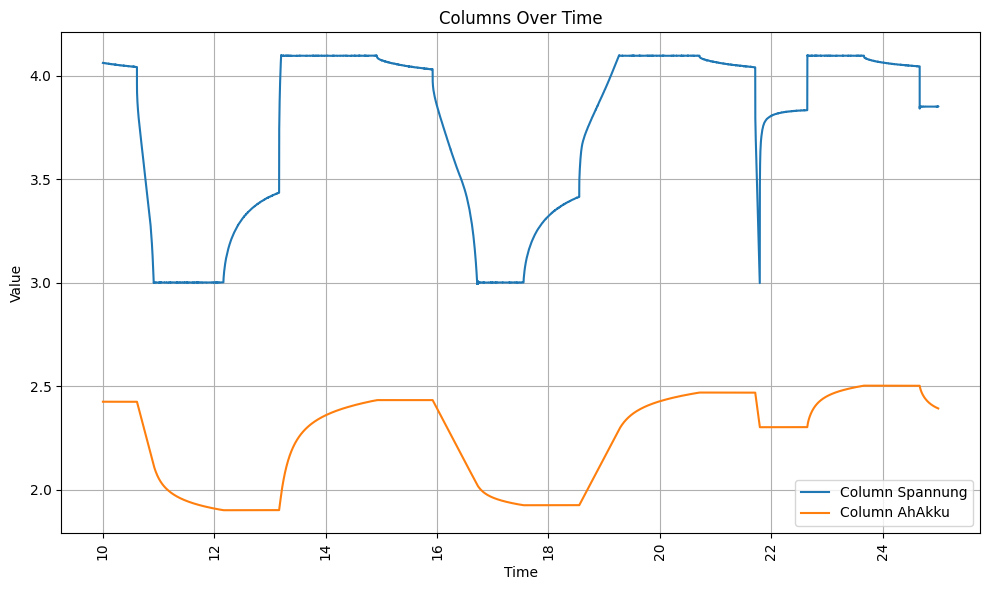

In [126]:
columns_to_plot = [15,9] 
#plotAllDates(dataframes[0],columns_to_plot)
I = 0
for i in dataframes:
    print("Graph No. :",I)
    print(dfarrnames[I])
    #plot(columns_to_plot,dataframes[I])
    plot_threshold(columns_to_plot, dataframes[I], 10, 25)
    I=I+1

# 2 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [127]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in dataframes:
    max_values = max_threshold(columns_to_plot, df, 11, 21)
    min_values = min_threshold(columns_to_plot, df, 11, 21)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[2.512948733623489], [2.506704811101372], [2.543738248838054], [2.538791181188572], [2.538695086757798], [3.259110481674725], [2.546989368292998], [2.718868245512567], [2.549460202593764], [2.618374756268167], [2.650589085063984], [2.467536640364415], [2.479579816266778], [2.501187635407405], [2.453454201666318], [2.382412096023472], [2.470213039210648]]
[[0.698714602887776], [0.7646620331606755], [0.7856070096895564], [0.8125349584051946], [0.8460636535046433], [1.562708852767173], [0.9101984712424382], [1.148079135291482], [1.141796210853499], [1.342393651402745], [1.486068386391708], [1.527462761572679], [1.647023849327525], [1.758972768002423], [1.767711578047965], [1.781450634285648], [1.901634442368959]]
[1.8142341307357128, 1.7420427779406964, 1.7581312391484976, 1.7262562227833773, 1.6926314332531547, 1.696401628907552, 1.6367908970505596, 1.5707891102210847, 1.407663991740265, 1.275981104865422, 1.164520698672276, 0.9400738787917358, 0.8325559669392528, 0.7422148674049822, 0.

### Extract Requried data
The extract contain the array of elements to plot for the calculation of capacity.

In [128]:
skip_indices = []

# Use list comprehension to skip specific indices
extracted_capacity_values = [value for i, value in enumerate(capacity_values_list) if i not in skip_indices]

iteration_range = range(len(extracted_capacity_values))

print(extracted_capacity_values)
print(iteration_range)

[1.8142341307357128, 1.7420427779406964, 1.7581312391484976, 1.7262562227833773, 1.6926314332531547, 1.696401628907552, 1.6367908970505596, 1.5707891102210847, 1.407663991740265, 1.275981104865422, 1.164520698672276, 0.9400738787917358, 0.8325559669392528, 0.7422148674049822, 0.685742623618353, 0.6009614617378238, 0.5685785968416888]
range(0, 17)


### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

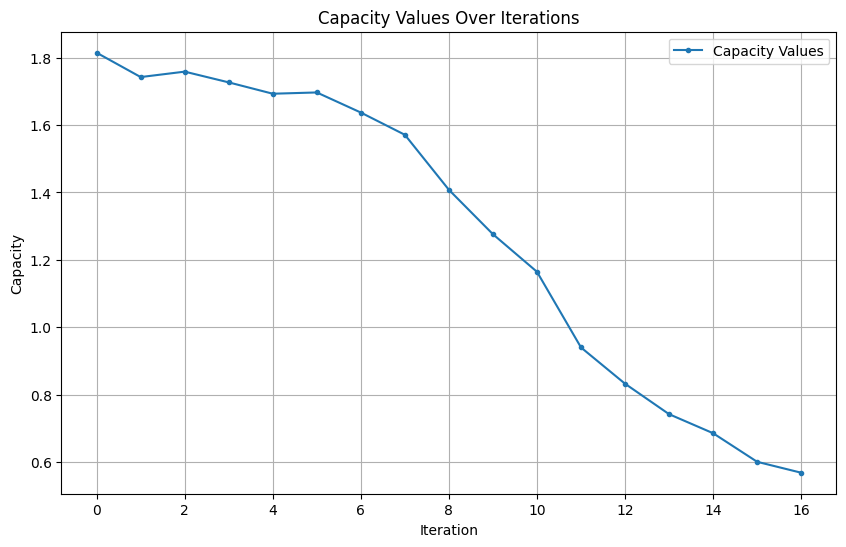

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [130]:
csv_filename = "extracted_capacity_values.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

Values have been appended to the CSV file 'extracted_capacity_values.csv'


### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

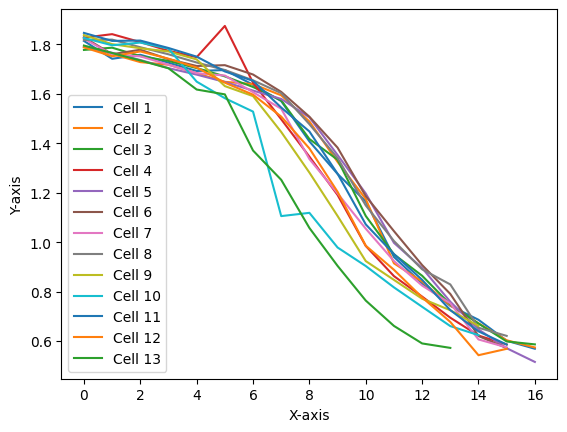

In [131]:
csv_file = 'extracted_capacity_values.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 3 Volatge Charging analysis

In [132]:
columns_to_check = [15] 
i=0
for df in dataframes:
    print(i)
    i=i+1
    print_times_near_threshold(columns_to_check, df, 16, 22, threshold=3.6)

0
Spannung , 3.6 t = 17.18984166668521
Spannung , 3.6 t = 20.58439722220103
1
Spannung , 3.6 t = 16.473408333328035
Spannung , 3.6 t = 19.790202777783076
Spannung , 3.6 t = 21.11533333334658
2
Spannung , 3.6 t = 17.5013611111376
Spannung , 3.6 t = 21.248766666650774
3
Spannung , 3.6 t = 17.051363888912732
Spannung , 3.6 t = 17.143016666637525
Spannung , 3.6 t = 20.715416666666666
Spannung , 3.6 t = 21.953230555521117
4
Spannung , 3.6 t = 17.381922222243414
Spannung , 3.6 t = 20.925750000013245
5
Spannung , 3.6 t = 16.90136388891273
Spannung , 3.6 t = 20.593194444444446
Spannung , 3.6 t = 21.816733333335982
6
Spannung , 3.6 t = 17.317997222211627
Spannung , 3.6 t = 20.88759722226196
7
Spannung , 3.6 t = 18.7400555555688
Spannung , 3.6 t = 21.77078888886505
8
Spannung , 3.6 t = 17.215044444402057
Spannung , 3.6 t = 20.07909999999735
9
Spannung , 3.6 t = 18.81781388892068
Spannung , 3.6 t = 21.57075833333863
10
Spannung , 3.6 t = 19.040041666693156
Spannung , 3.6 t = 21.69853611111641
11


### Ploting Voltage
`data_extract` is the array of `(dataframe,starttime)`
- `starttime` is  the that you will place manully by using data above code output
- try to use first most value of the repected data frame if it is not working use the last one or randomly
- you can look above 35 graphs to figure out the proper value of  `starttime`
- `dataframe` is the correct that you want to include in the ploting 

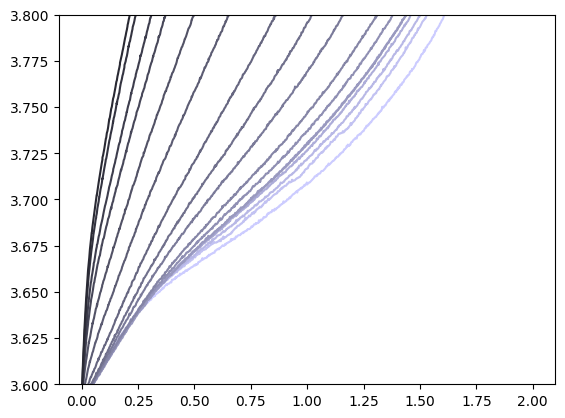

In [134]:
columns_to_plot = [15] 

data_extract = [
    (0, 17.18984166668521),
    (1, 16.473408333328035),
    (2, 17.5013611111376),          
    (3, 17.051363888912732),
    (4, 17.381922222243414),
    (5, 16.90136388891273),
    (6, 17.317997222211627),
    (7, 21.77078888886505),
    (8, 20.07909999999735),
    (9, 21.57075833333863),
    (10, 21.69853611111641), 
    (11, 19.765241666701105),
    (12, 19.64445555554496),
    (13, 18.8569111111429),
    (14, 18.817994444436497),
    (15, 17.723547222216926),
    (16, 18.57358888891008)
]

plt1 = plt
i=0
for dataframe_index, time_start in data_extract:
    time_end = time_start + 2
    plot_threshold_same_plot(columns_to_plot, dataframes[dataframe_index], time_start, time_end, plt1, y_min=3.6, y_max=3.8,i=i)
    i=i+1

plt.show()

### Croping Data

In [135]:
from functions import crop_data_within_time_range
import os

output_directory = "cropped_data"
os.makedirs(output_directory, exist_ok=True)

In [136]:
columns_to_plot = [15, 9]

data_extract = [
    (0, 17.18984166668521),
    (1, 16.473408333328035),
    (2, 17.5013611111376),
    (3, 17.051363888912732),
    (4, 17.381922222243414),
    (5, 16.90136388891273),
    (6, 17.317997222211627),
    (7, 21.77078888886505),
    (8, 20.07909999999735),
    (9, 21.57075833333863),
    (10, 21.69853611111641),
    (11, 19.765241666701105),
    (12, 19.64445555554496),
    (13, 18.8569111111429),
    (14, 18.817994444436497),
    (15, 17.723547222216926),
    (16, 18.57358888891008)
]

extract = [item[0] for item in data_extract]

extracted_capacity_values = [capacity_values_list[i] for i in extract]

i = 0
for dataframe_index, time_start in data_extract:
    time_end = time_start + 2
    cropdf = crop_data_within_time_range(columns_to_plot, dataframes[dataframe_index], time_start, time_end)

    cropdf['total_capacity_values'] = extracted_capacity_values[i]

    csv_filename = os.path.join(output_directory, f"cropdf_{i}.csv")
    cropdf.to_csv(csv_filename, index=False)
    
    print(f"Saved CSV file: {csv_filename}")
    i += 1


Saved CSV file: cropped_data\cropdf_0.csv
Saved CSV file: cropped_data\cropdf_1.csv
Saved CSV file: cropped_data\cropdf_2.csv
Saved CSV file: cropped_data\cropdf_3.csv
Saved CSV file: cropped_data\cropdf_4.csv
Saved CSV file: cropped_data\cropdf_5.csv
Saved CSV file: cropped_data\cropdf_6.csv
Saved CSV file: cropped_data\cropdf_7.csv
Saved CSV file: cropped_data\cropdf_8.csv
Saved CSV file: cropped_data\cropdf_9.csv
Saved CSV file: cropped_data\cropdf_10.csv
Saved CSV file: cropped_data\cropdf_11.csv
Saved CSV file: cropped_data\cropdf_12.csv
Saved CSV file: cropped_data\cropdf_13.csv
Saved CSV file: cropped_data\cropdf_14.csv
Saved CSV file: cropped_data\cropdf_15.csv
Saved CSV file: cropped_data\cropdf_16.csv


In [137]:

merged_df = pd.DataFrame()

for filename in os.listdir(output_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(output_directory, filename)

        df = pd.read_csv(file_path)

        df = df[(df['Spannung'] >= 3.65) & (df['Spannung'] <= 3.85)]

        merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_csv_filename = 'filtered_data_output.csv'
merged_df.to_csv(merged_csv_filename, index=False)

print(f"Merged and filtered data saved to: {merged_csv_filename}")

Merged and filtered data saved to: filtered_data_output.csv


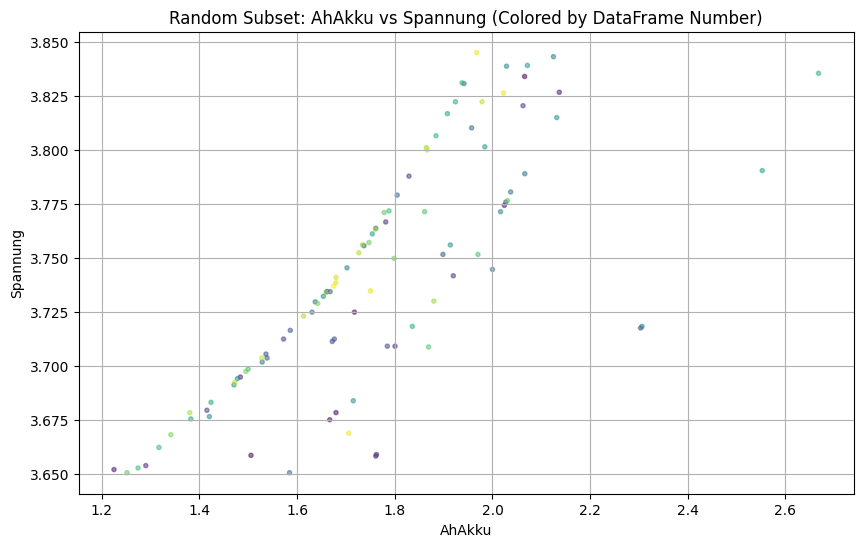

In [150]:
df = pd.read_csv(merged_csv_filename)

# Extract the columns
voltage = df['Spannung']
current = df['AhAkku']

# Randomly select 1000 values
random_indices = np.random.choice(len(df), size=100, replace=False)
voltage_sample = voltage.iloc[random_indices]
current_sample = current.iloc[random_indices]

# Create a colormap based on the index of the selected points
colors = plt.cm.viridis(np.linspace(0, 1, len(random_indices)))

# Plot the data with switched x and y axes, using the colormap
plt.figure(figsize=(10, 6))

plt.scatter(current_sample, voltage_sample, marker='.', color=colors, alpha=0.5)

plt.title('Random Subset: AhAkku vs Spannung (Colored by DataFrame Number)')
plt.xlabel('AhAkku')
plt.ylabel('Spannung')
plt.grid(True)
plt.show()